### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline

In [2]:
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
import matplotlib.pylab as plt
from scipy.stats import zscore

In [3]:
# reading the CSV file into pandas dataframe
vehicle_data = pd.read_csv("vehicle.csv")
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
print(vehicle_data.isnull().any())
# dropping rows with all null values 
vehicle_data.dropna(axis = 0, inplace = True)

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool


In [5]:
vehicle_data.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [6]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [7]:
vehicle_data.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


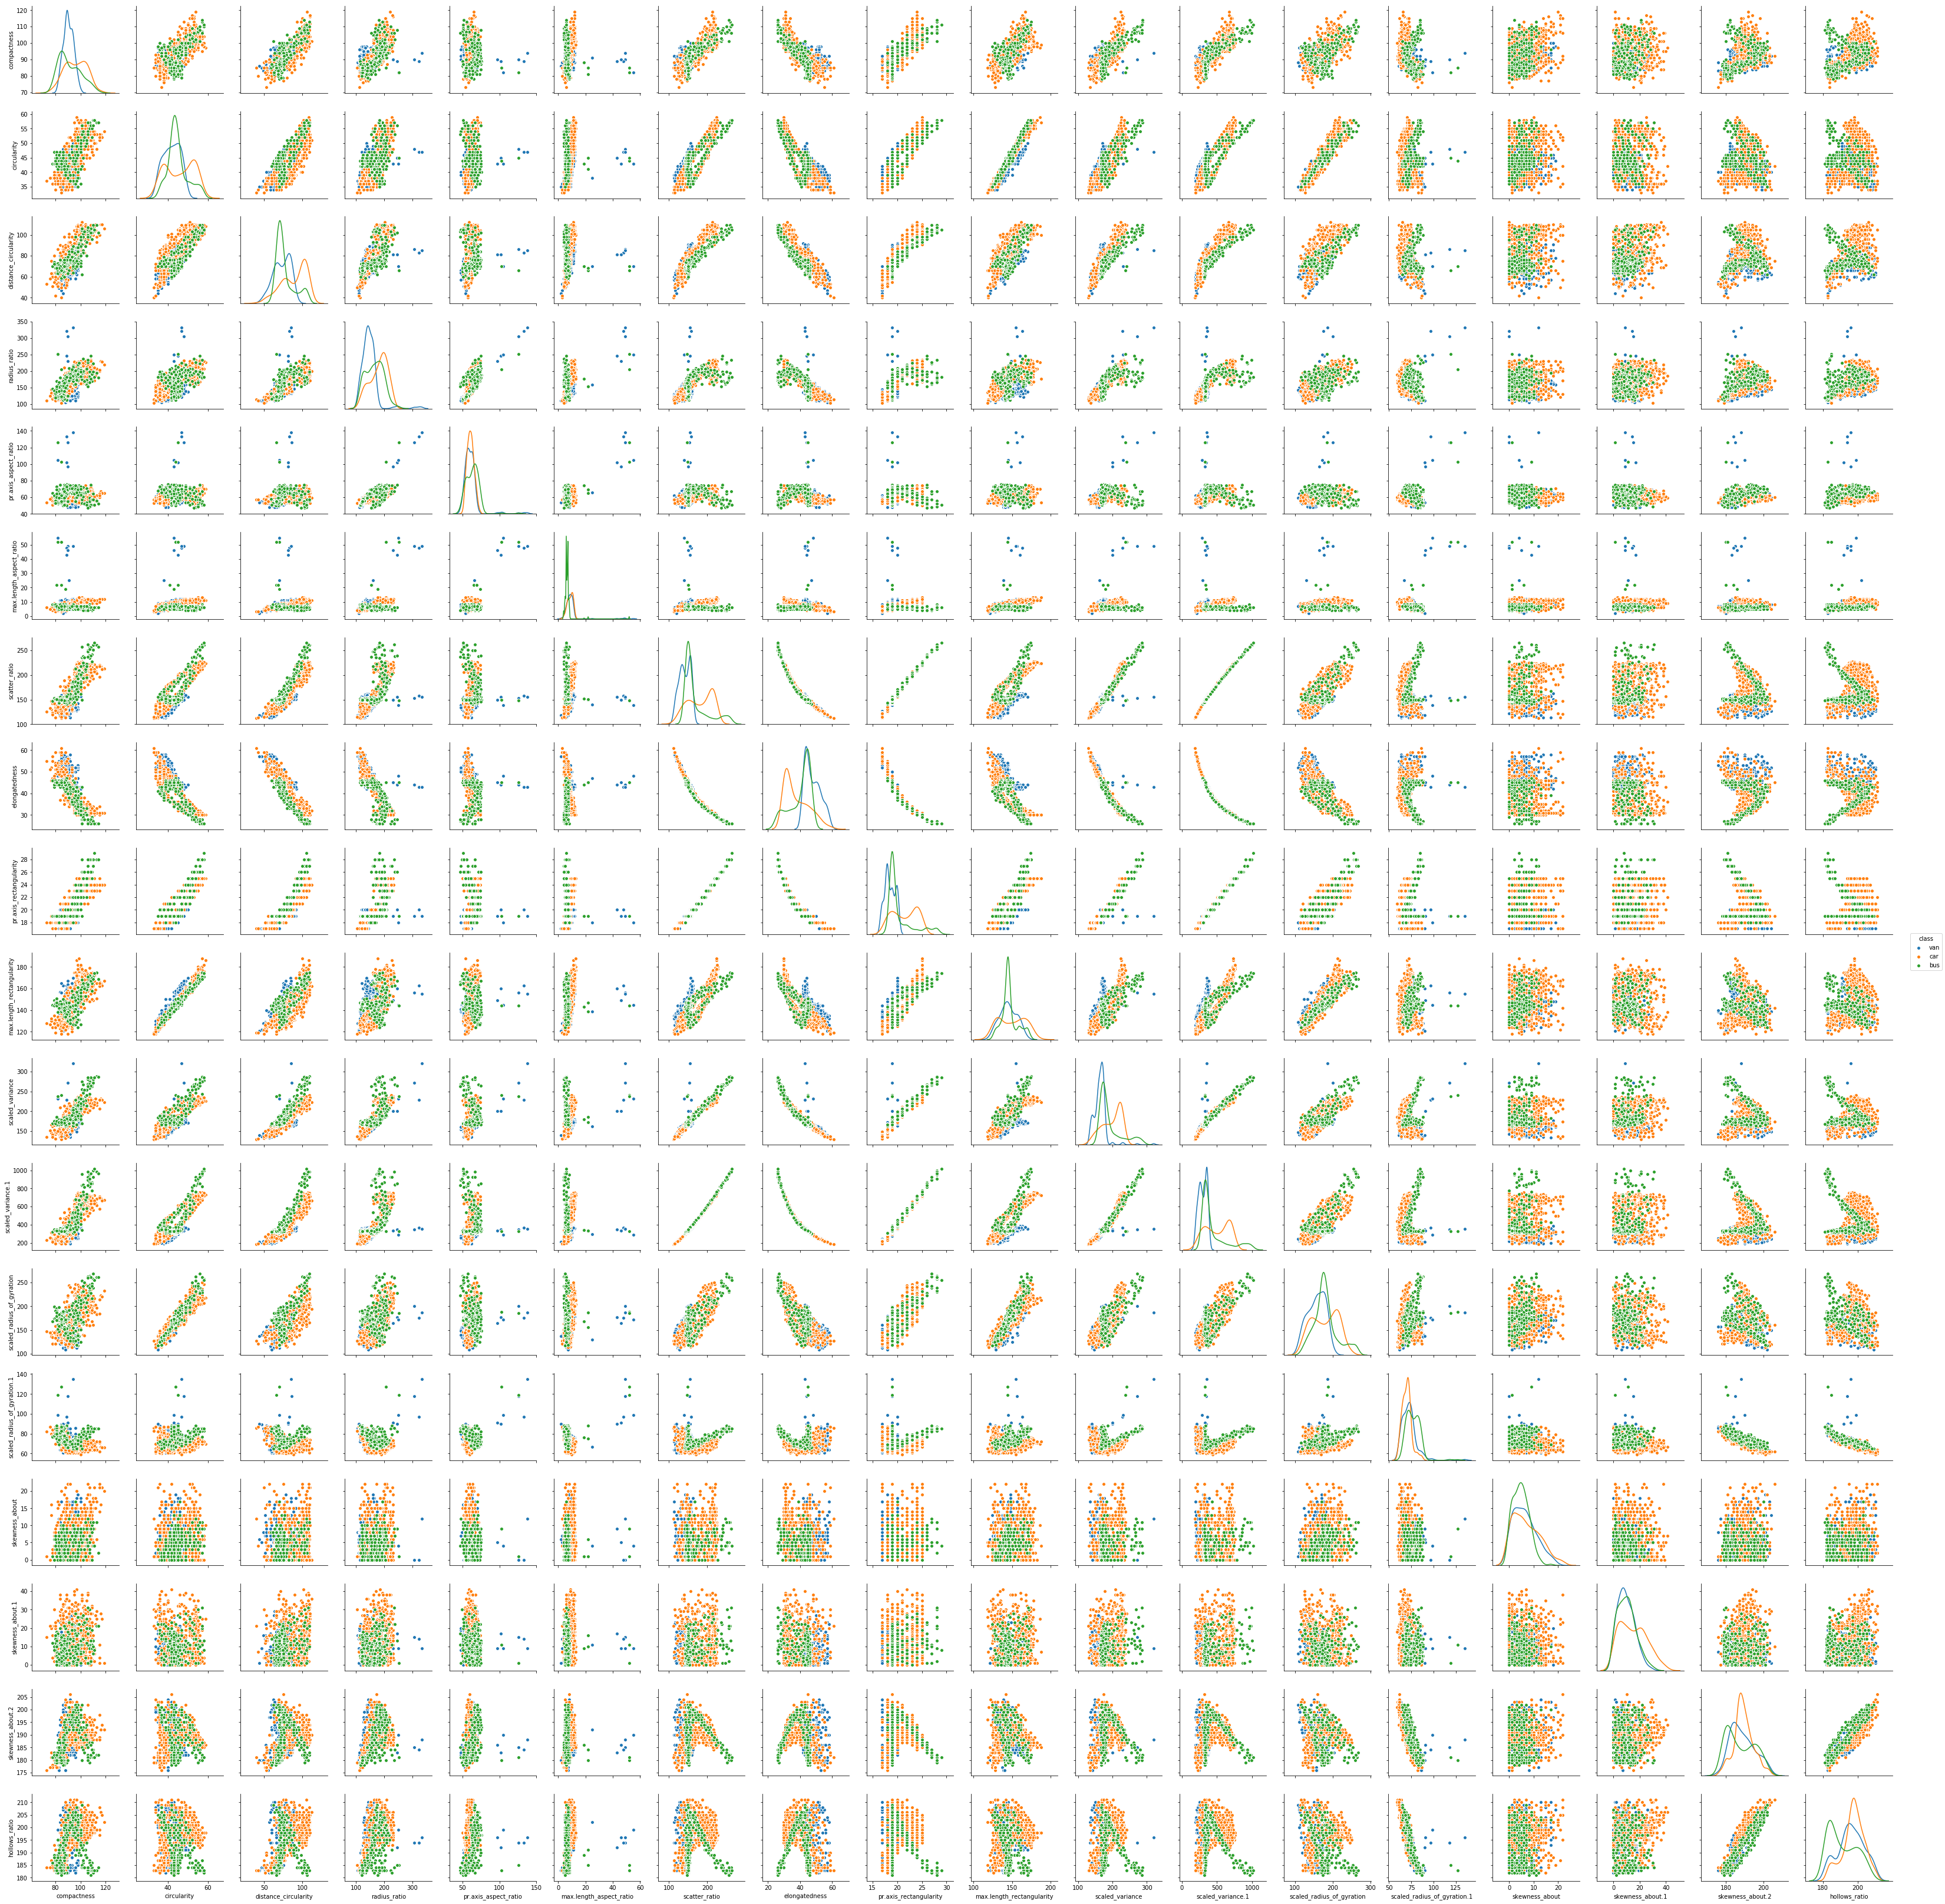

In [16]:
#pair plot analysis to visually check number of likely clusters
sns.pairplot(vehicle_data, hue='class', diag_kind='kde')

Since the variable is categorical, you can use value_counts function

In [8]:
pd.value_counts(vehicle_data['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

In [107]:
vehicle_data['class'] = pd.factorize(vehicle_data['class'])[0]

In [108]:
pd.value_counts(vehicle_data['class'])

1    413
2    205
0    195
Name: class, dtype: int64

In [9]:
vehicle_data = pd.get_dummies(vehicle_data, columns=['class'])
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

     ...      scaled_variance.1  scaled_radius_of_gyration  \
0    ...                  379.0                      184.0   
1    ...                  330.0                      158.0   
2    ...                  635.0                      220.0   
3    ...                  309.0                      127.0   
4    ...                  325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class_bus  class_car  class_van  
0             187.0            197          0          0          1  
1             189.0            199          0          0          1  
2             188.0            196          0          1          0  
3             199.0            207          0          0          1  
4             180.0            183          1          0          0  

[5 rows x 21 columns]

In [10]:
vehicle_data.shape

(813, 21)

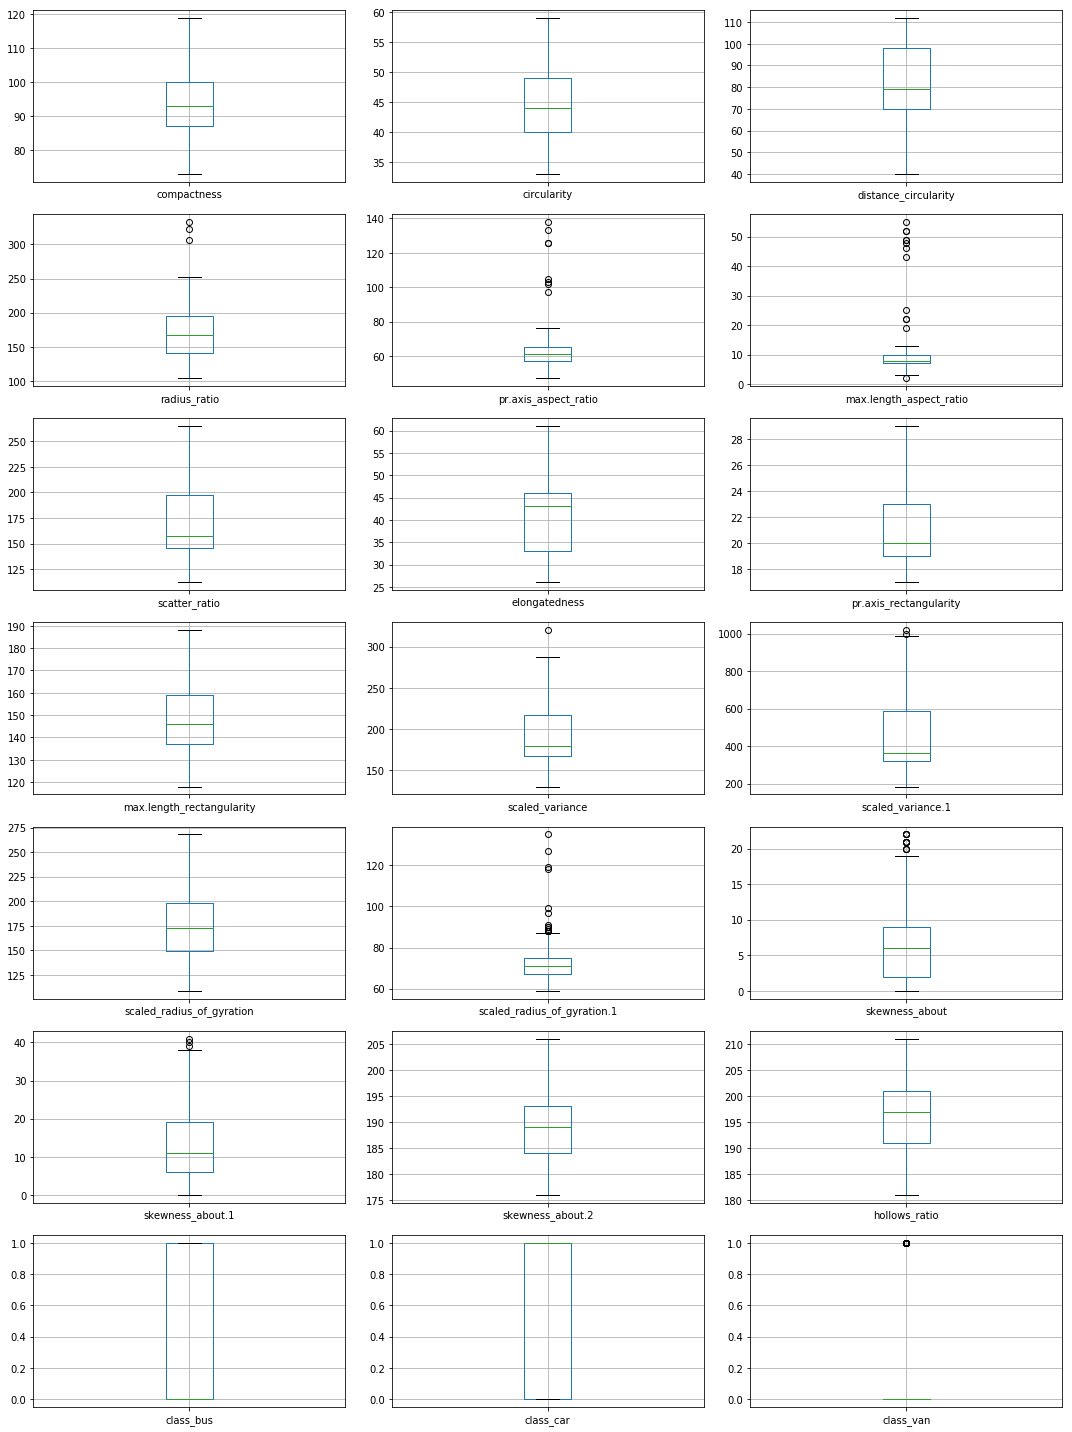

In [11]:
fig, axes = plt.subplots(7,3,figsize=(15,20)) # create figure and axes

for i,el in enumerate(list(vehicle_data.columns.values)[:]):
    a = vehicle_data.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout()
plt.show()

In [12]:
vehicle_data.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689885              0.789955   
circularity                     0.689885     1.000000              0.797704   
distance_circularity            0.789955     0.797704              1.000000   
radius_ratio                    0.688130     0.623950              0.771404   
pr.axis_aspect_ratio            0.090557     0.155023              0.163386   
max.length_aspect_ratio         0.150369     0.251619              0.265591   
scatter_ratio                   0.814026     0.858149              0.909023   
elongatedness                  -0.788051    -0.825108             -0.912713   
pr.axis_rectangularity          0.814227     0.856137              0.897261   
max.length_rectangularity       0.674902     0.965366              0.773459   
scaled_variance                 0.764386     0.806108              0.865683   
scaled_variance.1               0.820240     0.850932              0.891789   
scaled_radius_of_gyration       0.581405     0.935594              0.705689   
scaled_radius_of_gyration.1    -0.258437     0.049070             -0.238145   
skewness_about                  0.231648     0.141726              0.110280   
skewness_about.1                0.168384    -0.001975              0.277851   
skewness_about.2                0.296195    -0.113902              0.145258   
hollows_ratio                   0.372806     0.049331              0.343228   
class_bus                      -0.153747     0.008459             -0.204685   
class_car                       0.319546     0.211185              0.450195   
class_van                      -0.217774    -0.255864             -0.318938   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.688130              0.090557   
circularity                      0.623950              0.155023   
distance_circularity             0.771404              0.163386   
radius_ratio                     1.000000              0.667375   
pr.axis_aspect_ratio             0.667375              1.000000   
max.length_aspect_ratio          0.452460              0.652093   
scatter_ratio                    0.743470              0.113696   
elongatedness                   -0.795761             -0.191193   
pr.axis_rectangularity           0.716210              0.086992   
max.length_rectangularity        0.570478              0.133553   
scaled_variance                  0.806788              0.290375   
scaled_variance.1                0.731773              0.100668   
scaled_radius_of_gyration        0.544636              0.135663   
scaled_radius_of_gyration.1     -0.175348              0.173060   
skewness_about                   0.044693             -0.059244   
skewness_about.1                 0.178079             -0.040769   
skewness_about.2                 0.375591              0.229702   
hollows_ratio                    0.470895              0.257566   
class_bus                       -0.043436              0.147576   
class_car                        0.354927             -0.096040   
class_van                       -0.371385             -0.037637   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.150369       0.814026   
circularity                                 0.251619       0.858149   
distance_circularity                        0.265591       0.909023   
radius_ratio                                0.452460       0.743470   
pr.axis_aspect_ratio                        0.652093       0.113696   
max.length_aspect_ratio                     1.000000       0.171445   
scatter_ratio                               0.171445       1.000000   
elongatedness                              -0.183242      -0.973413   
pr.axis_rectangularity                      0.167514       0.991992   
max.length_rectangularity                   0.309180       0.808154   
scaled_variance                   

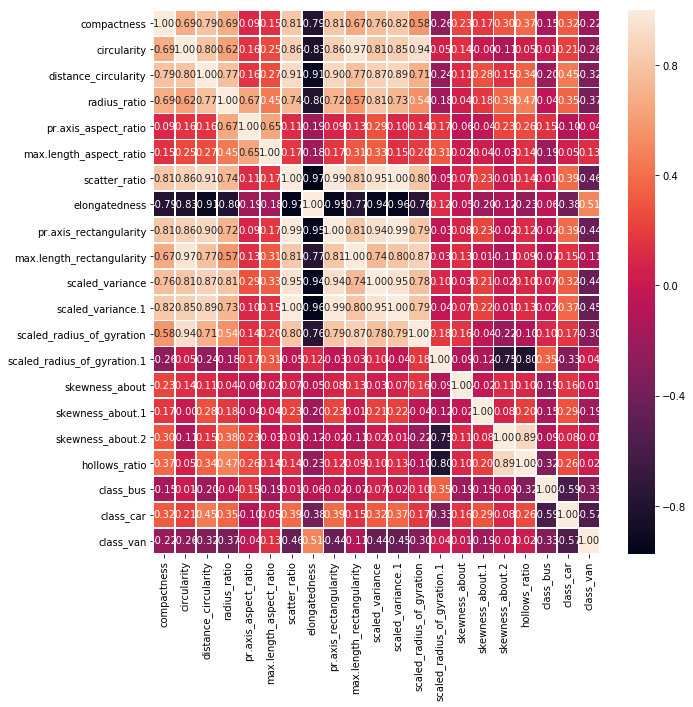

In [13]:
# Correlation
vehicle_corr = vehicle_data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(vehicle_corr,annot=True, linewidth=.75, fmt='.2f' , ax=ax)

### Check for any missing values in the data 

In [14]:
vehicle_data.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class_bus                      False
class_car                      False
class_van                      False
dtype: bool

### 3. Standardize the data 

In [15]:
numeric_col = vehicle_data.select_dtypes(include=['float64','int64']).columns
vehicle_data_z = vehicle_data
vehicle_data_z[numeric_col] = vehicle_data[numeric_col].apply(zscore)
vehicle_data_z.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0      0.163231     0.520408              0.060669      0.264970   
1     -0.322874    -0.619123              0.124067     -0.836393   
2      1.256966     0.845988              1.518823      1.187734   
3     -0.079822    -0.619123             -0.002729     -0.300595   
4     -1.052030    -0.130753             -0.763506      1.068668   
6      0.406283    -0.293543             -0.573312      0.116137   
7     -0.444400    -0.293543             -1.017098     -0.360128   
8     -0.930504    -1.758654             -1.270690     -0.866160   
10    -0.930504    -1.433074             -0.763506     -0.776860   
11    -0.444400    -1.758654             -1.017098     -0.985226   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0               1.283254                 0.299721      -0.198517   
1              -0.599253                 0.085785      -0.591720   
2               0.530251                 0.299721       1.162569   
3               0.153750                 0.085785      -0.742952   
4               5.173770                 9.285029      -0.591720   
6               0.404751                -0.556023      -0.470734   
7               0.404751                 0.085785      -0.954676   
8              -0.097251                -0.342087      -1.408372   
10             -0.097251                 0.085785      -1.075662   
11             -0.850254                -0.556023      -1.378125   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0        0.129648               -0.217151                   0.766312   
1        0.514333               -0.606014                  -0.337462   
2       -1.152637                0.949438                   0.697326   
3        0.642562               -0.606014                  -0.337462   
4        0.514333               -0.606014                  -0.268476   
6        0.129648               -0.606014                  -0.337462   
7        0.899019               -0.994877                  -0.130505   
8        1.668390               -1.383740                  -1.441236   
10       1.155476               -0.994877                  -1.234278   
11       1.668390               -1.383740                  -2.062109   

      ...      scaled_variance.1  scaled_radius_of_gyration  \
0     ...              -0.339014                   0.301676   
1     ...              -0.618754                  -0.502972   
2     ...               1.122486                   1.415804   
3     ...              -0.738643                  -1.462359   
4     ...              -0.647299                   0.425468   
6     ...              -0.441776                  -0.069700   
7     ...              -0.898494                  -0.317284   
8     ...              -1.229615                  -1.926579   
10    ...              -0.984129                  -1.462359   
11    ...              -1.223906                  -1.740891   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     -0.321192       -0.071523          0.371287   
1                     -0.053505        0.538425          0.147109   
2                      0.080339        1.555006         -0.413338   
3                     -1.258099       -0.071523         -0.301249   
4                      7.307905        0.538425         -0.189159   
6                     -0.856567        1.351690         -1.310052   
7                     -0.722724       -0.681472         -1.085874   
8                     -1.124255       -0.884788          0.147109   
10                    -0.856567       -0.884788         -0.301249   
11                    -0.990411       -0.274839          1.492180   

    skewness_about.2  hollows_ratio  class_bus  class_car  class_van  
0          -0.321809       0.171837          0          0          1  
1           0.003400       0.442318          0          0          1  
2          -0.159204       0.036596          0

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

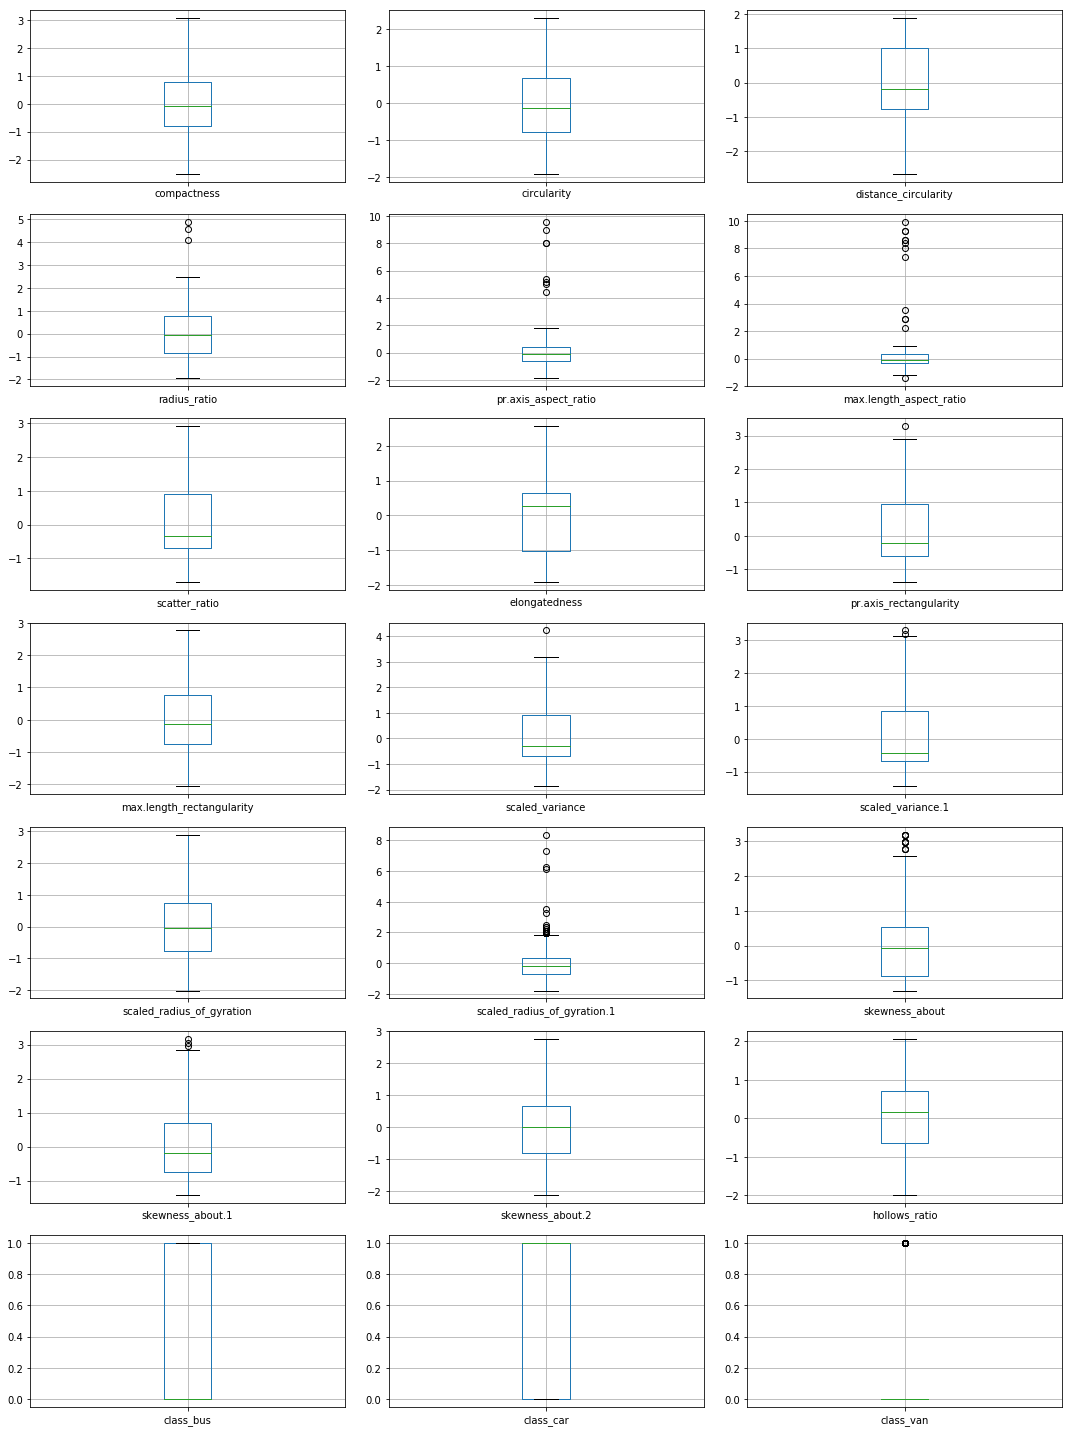

In [16]:
fig, axes = plt.subplots(7,3,figsize=(15,20)) # create figure and axes

for i,el in enumerate(list(vehicle_data_z.columns.values)[:]):
    a = vehicle_data_z.boxplot(el, ax=axes.flatten()[i])

#fig.delaxes(axes[2,2]) # remove empty subplot
#fig.delaxes(axes[2,3]) # remove empty subplot
plt.tight_layout() 
plt.show()

In [17]:
vehicle_data_z.describe().T

count          mean       std       min  \
compactness                  813.0 -2.425284e-16  1.000616 -2.510344   
circularity                  813.0 -4.642999e-16  1.000616 -1.921444   
distance_circularity         813.0 -2.351542e-16  1.000616 -2.665447   
radius_ratio                 813.0  3.665238e-16  1.000616 -1.937757   
pr.axis_aspect_ratio         813.0 -2.047016e-16  1.000616 -1.854258   
max.length_aspect_ratio      813.0 -1.349201e-16  1.000616 -1.411767   
scatter_ratio                813.0  3.714399e-16  1.000616 -1.710835   
elongatedness                813.0 -2.062038e-16  1.000616 -1.922008   
pr.axis_rectangularity       813.0 -2.651972e-16  1.000616 -1.383740   
max.length_rectangularity    813.0 -7.398756e-16  1.000616 -2.062109   
scaled_variance              813.0 -3.031605e-17  1.000616 -1.874279   
scaled_variance.1            813.0 -3.550529e-17  1.000616 -1.452266   
scaled_radius_of_gyration    813.0  3.348422e-16  1.000616 -2.019423   
scaled_radius_of_gyration.1  813.0  1.312159e-16  1.000616 -1.793474   
skewness_about               813.0 -1.693329e-17  1.000616 -1.291420   
skewness_about.1             813.0  9.845889e-17  1.000616 -1.422141   
skewness_about.2             813.0 -1.169490e-15  1.000616 -2.110457   
hollows_ratio                813.0  3.482249e-16  1.000616 -1.992013   
class_bus                    813.0  2.521525e-01  0.434516  0.000000   
class_car                    813.0  5.079951e-01  0.500244  0.000000   
class_van                    813.0  2.398524e-01  0.427256  0.000000   

                                  25%       50%       75%       max  
compactness                 -0.808978 -0.079822  0.770861  3.079857  
circularity                 -0.781913 -0.130753  0.683198  2.311100  
distance_circularity        -0.763506 -0.192923  1.011639  1.899212  
radius_ratio                -0.836393 -0.062462  0.771002  4.878790  
pr.axis_aspect_ratio        -0.599253 -0.097251  0.404751  9.566288  
max.length_aspect_ratio     -0.342087 -0.128151  0.299721  9.926837  
scatter_ratio               -0.682459 -0.349749  0.890352  2.916857  
elongatedness               -1.024408  0.257876  0.642562  2.565989  
pr.axis_rectangularity      -0.606014 -0.217151  0.949438  3.282615  
max.length_rectangularity   -0.751377 -0.130505  0.766312  2.766901  
scaled_variance             -0.686352 -0.301079  0.918954  4.225885  
scaled_variance.1           -0.687262 -0.424649  0.842746  3.309026  
scaled_radius_of_gyration   -0.781504 -0.038752  0.734948  2.901308  
scaled_radius_of_gyration.1 -0.722724 -0.187348  0.348027  8.378655  
skewness_about              -0.884788 -0.071523  0.538425  3.181535  
skewness_about.1            -0.749606 -0.189159  0.707555  3.173519  
skewness_about.2            -0.809622  0.003400  0.653818  2.767675  
hollows_ratio               -0.639607  0.171837  0.712800  2.065206  
class_bus                    0.000000  0.000000  1.000000  1.000000  
class_car                    0.000000  1.000000  1.000000  1.000000  
class_van                    0.000000  0.000000  0.000000  1.000000

In [18]:
print(vehicle_data_z[vehicle_data_z['compactness'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['compactness'] <= 3]

(1, 21)


In [19]:
print(vehicle_data_z[vehicle_data_z['radius_ratio'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['radius_ratio'] <= 3]

(3, 21)


In [20]:
print(vehicle_data_z[vehicle_data_z['pr.axis_aspect_ratio'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['pr.axis_aspect_ratio'] <= 3]

(5, 21)


In [21]:
print(vehicle_data_z[vehicle_data_z['max.length_aspect_ratio'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['max.length_aspect_ratio'] <= 3]

(1, 21)


In [22]:
print(vehicle_data_z[vehicle_data_z['pr.axis_rectangularity'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['pr.axis_rectangularity'] <= 3]

(1, 21)


In [23]:
print(vehicle_data_z[vehicle_data_z['scaled_variance'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['scaled_variance'] <= 3]

(3, 21)


In [24]:
print(vehicle_data_z[vehicle_data_z['scaled_variance.1'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['scaled_variance.1'] <= 3]

(1, 21)


In [25]:
print(vehicle_data_z[vehicle_data_z['scaled_radius_of_gyration.1'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['scaled_radius_of_gyration.1'] <= 3]

(0, 21)


In [26]:
print(vehicle_data_z[vehicle_data_z['skewness_about'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['skewness_about'] <= 3]

(4, 21)


In [27]:
print(vehicle_data_z[vehicle_data_z['skewness_about.1'] > 3].shape)
vehicle_data_z = vehicle_data_z[vehicle_data_z['skewness_about.1'] <= 3]

(2, 21)


In [28]:
vehicle_data_z.shape

(792, 21)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [29]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [30]:
# Let us check optimal number of clusters-
cluster_range = range( 1, 11)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6

cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( clusters.inertia_ )    # capture the intertia

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [31]:
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion} )
clusters_df[0:15]

num_clusters    distortion
0             1  13100.990039
1             2   7300.736111
2             3   5752.009887
3             4   5226.763452
4             5   4738.880860
5             6   4441.291079
6             7   4164.634211
7             8   3936.668873
8             9   3709.634486
9            10   3511.886371

### 6. Plotting Elbow/ Scree Plot

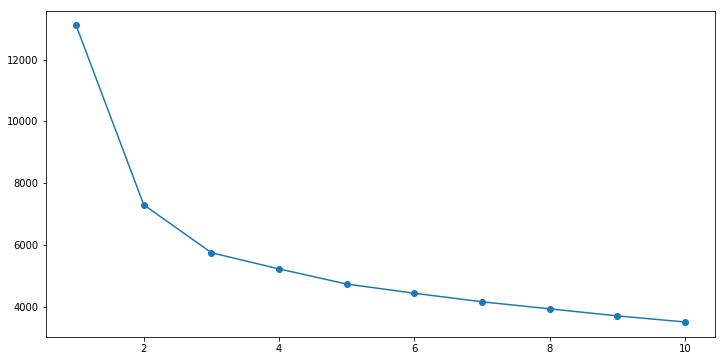

In [32]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [33]:
### optimal value of k is 3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [34]:
kmeans = KMeans( n_clusters = 3, random_state = 1 )
kmeans.fit(vehicle_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [35]:
# Get the centroids.... using function cluster_centers_

centroids = kmeans.cluster_centers_
centroids

array([[-2.33621811e-01, -5.78559083e-01, -3.16393681e-01,
        -5.27026879e-02,  1.77203897e-01, -1.90578237e-01,
        -4.64586055e-01,  3.29768516e-01, -4.93817333e-01,
        -5.43288827e-01, -4.30029733e-01, -4.68355107e-01,
        -6.05556547e-01, -6.35834878e-01, -7.01900549e-02,
        -9.44892403e-03,  8.11623914e-01,  6.88411852e-01,
         2.59016393e-01,  4.09836066e-01,  3.31147541e-01],
       [ 1.11113418e+00,  1.15984760e+00,  1.20056536e+00,
         9.74843588e-01,  1.13087538e-01,  2.26982586e-01,
         1.26141383e+00, -1.19572166e+00,  1.26052790e+00,
         1.07950730e+00,  1.16463015e+00,  1.26534739e+00,
         1.05482677e+00, -1.42376888e-01,  1.34232683e-01,
         2.65026511e-01,  2.94167954e-02,  2.23228510e-01,
         1.56000000e-01,  8.44000000e-01,  3.33066907e-16],
       [-9.19223347e-01, -5.20212715e-01, -8.90301778e-01,
        -1.08783930e+00, -5.60067548e-01, -2.97855475e-01,
        -7.77792439e-01,  8.64391814e-01, -7.43838641e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [36]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(vehicle_data_z) )
centroid_df.transpose()

0             1         2
compactness                 -0.233622  1.111134e+00 -0.919223
circularity                 -0.578559  1.159848e+00 -0.520213
distance_circularity        -0.316394  1.200565e+00 -0.890302
radius_ratio                -0.052703  9.748436e-01 -1.087839
pr.axis_aspect_ratio         0.177204  1.130875e-01 -0.560068
max.length_aspect_ratio     -0.190578  2.269826e-01 -0.297855
scatter_ratio               -0.464586  1.261414e+00 -0.777792
elongatedness                0.329769 -1.195722e+00  0.864392
pr.axis_rectangularity      -0.493817  1.260528e+00 -0.743839
max.length_rectangularity   -0.543289  1.079507e+00 -0.482420
scaled_variance             -0.430030  1.164630e+00 -0.799063
scaled_variance.1           -0.468355  1.265347e+00 -0.782532
scaled_radius_of_gyration   -0.605557  1.054827e+00 -0.387537
scaled_radius_of_gyration.1 -0.635835 -1.423769e-01  0.794738
skewness_about              -0.070190  1.342327e-01 -0.107554
skewness_about.1            -0.009449  2.650265e-01 -0.304086
skewness_about.2             0.811624  2.941680e-02 -1.056616
hollows_ratio                0.688412  2.232285e-01 -1.110951
class_bus                    0.259016  1.560000e-01  0.337553
class_car                    0.409836  8.440000e-01  0.295359
class_van                    0.331148  3.330669e-16  0.367089

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [78]:
## creating a new dataframe only for labels and converting it into categorical variable
vehicle_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

vehicle_labels['labels'] = vehicle_labels['labels'].astype('category')

In [79]:
vehicle_data_z = vehicle_data_z.reset_index(drop=True)

In [80]:
# Joining the label dataframe with the vehicle data frame to create vehicle_data_labeled. 
# it is appended to original dataframe
vehicle_data_labeled = vehicle_data_z.join(vehicle_labels)

In [81]:
vehicle_analysis = (vehicle_data_labeled.groupby(['labels'] , axis=0)).head(1000)  
# the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. using .head(30000) for that
vehicle_analysis

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
4       0.406283    -0.293543             -0.573312      0.116137   
5      -0.444400    -0.293543             -1.017098     -0.360128   
6      -0.930504    -1.758654             -1.270690     -0.866160   
7      -0.930504    -1.433074             -0.763506     -0.776860   
8      -0.444400    -1.758654             -1.017098     -0.985226   
9      -0.687452     0.194828             -0.509914      0.056604   
10     -0.565926    -0.456333              0.187465     -0.747094   
11      0.041705     0.683198             -0.192923      1.009135   
12      0.284757     1.659939              1.328629      0.949602   
13     -0.565926    -1.433074             -1.968068     -1.788924   
14      0.649335    -0.619123             -0.319719      0.830535   
15      1.256966     1.497149              1.138435      0.503103   
16     -1.173556     0.357618             -0.446516     -0.479194   
17     -1.173556    -1.270284             -1.841272     -1.431725   
18      0.041705    -0.293543             -1.143894      0.116137   
19     -0.808978    -0.944703             -0.763506     -0.628027   
20      0.649335     1.334359              1.455425      1.485400   
21     -1.052030     0.032037             -0.129525     -0.449428   
22     -1.295083    -1.433074             -1.777874     -1.491258   
23      1.621544     1.497149              1.011639      1.009135   
24      1.013913     0.032037              0.187465      0.711469   
25     -1.659661    -1.107494             -1.207292     -1.193592   
26     -0.565926    -0.293543              0.187465     -0.270828   
27     -0.687452    -0.456333             -0.319719     -0.538728   
28     -0.079822    -1.595864             -1.017098     -0.449428   
29      0.892387     0.520408              1.582222      1.574700   
..           ...          ...                   ...           ...   
762    -1.538135     0.032037             -0.890302     -0.449428   
763    -0.444400     0.520408              0.187465     -0.360128   
764     1.256966     1.334359              1.645620      1.038901   
765     0.163231    -0.293543              0.884843      0.979368   
766    -0.079822    -0.456333              1.011639      0.681702   
767    -0.808978    -1.107494             -0.700108     -1.372192   
768     1.256966     1.822729              0.884843      1.842599   
769     0.163231    -0.619123             -0.002729      0.026838   
770     1.378492     1.497149              1.455425      1.306800   
771     1.500018     1.659939              0.884843      0.800769   
772    -0.930504    -0.944703              0.124067     -0.598261   
773     0.163231     0.683198              0.631251      0.711469   
774     0.649335     1.985519              1.138435      0.235204   
775    -0.565926    -0.456333             -1.017098     -1.312659   
776     0.163231     0.683198             -0.002729     -0.895926   
777     0.406283    -1.270284             -0.763506      0.116137   
778     0.770861     0.357618             -0.763506      0.473336   
779     1.743070     0.683198              1.709018      1.038901   
780    -0.201348     0.194828              0.060669     -0.449428   
781    -1.416609    -1.433074             -1.968068     -1.640091   
782    -0.808978     0.032037             -1.017098     -0.895926   
783     0.041705     0.194828             -0.319719     -0.002929   
784     0.163231    -0.293543             -0.383118     -0.806627   
785    -0.444400    -0.130753             -0.636710     -0.360128   
786    -0.079822    -1.758654             -1.017098     -0.866160   
787    -0.079822    -0.944703              0.314261      0.413803   
788